<h3>Primeiro vou gerar uma base de dados de idades

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) #to usando uma seed fixa pra ter controle dos dados (do sorteio)
ages = np.random.randint(low=15, high=70, size=40) #sortear idades de 15 a 70

ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

<h3>Aqui vou definir que quem tiver mais que 29 anos terá um seguro, e faço isso com essa lista que usará 0 ou 1 para cada pessoa na posição da lista

In [6]:
labels = []
for age in ages:
    if age < 30:
        labels.append(0)
    else:
        labels.append(1)

<h3>Mostro as pessoas que têm seguro e não tem

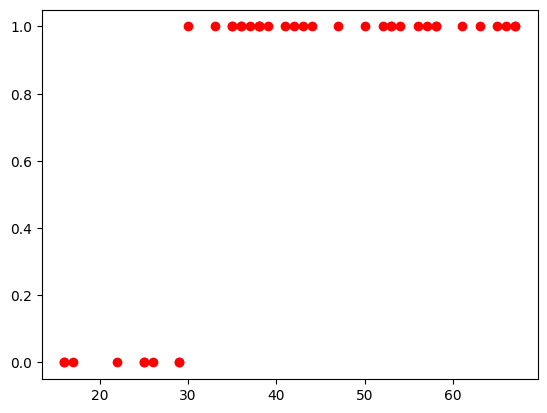

In [7]:
plt.scatter(ages, labels, color="red")
plt.show()

<h3>Usando a regressão logística - Boa para previsões de valores binários (nesse caso, os valores binários seriam se a pessoa vai usar um seguro ou não)

30.0107990005599


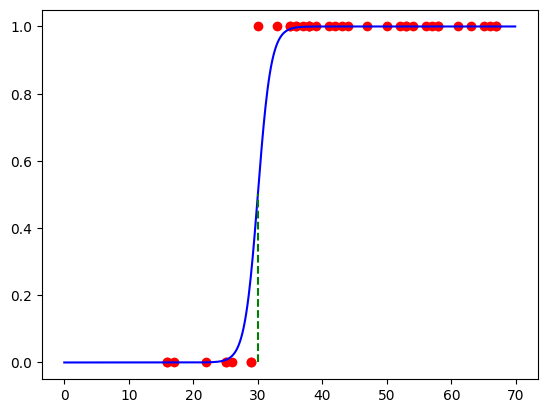

In [8]:
from sklearn.linear_model import LogisticRegression
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

model = LogisticRegression()
model.fit(ages.reshape(-1,1), labels)

a = model.coef_[0][0]
b = model.intercept_[0]

limiar_idade = abs(b / a)
print(limiar_idade)

x = np.arange(0, 70, 0.1)
sig = sigmoid(a*x + b)

plt.scatter(ages, labels, color="red")
plt.plot(x, sig, color='blue')
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.show()